In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

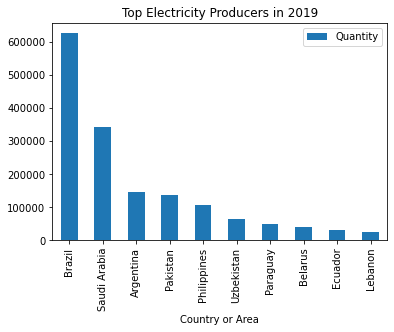

In [6]:
production=pd.read_csv('../notebooks/electricty_production.csv')
production=production.fillna(0)
producers_by_quantity=production.groupby("Country or Area")["Quantity"].sum()
producers_2019=production[production["Year"]==2019.0]
producers_by_quantity_2019=producers_2019.sort_values("Quantity", ascending=False)
producers_by_quantity_2019_top10=producers_by_quantity_2019.head(10)
producers_by_quantity_2019_top10.plot(x="Country or Area", y="Quantity", title="Top Electricity Producers in 2019", kind="bar")
plt.show()

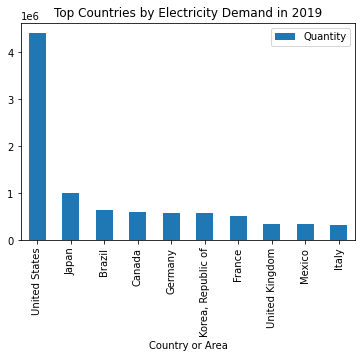

In [20]:
demand=pd.read_csv('../notebooks/electricity_demand.csv')
demand_by_quantity=demand.groupby("Country or Area")["Quantity"].sum()
demand_2019=demand[demand["Year"]==2019.0]
demand_by_quantity_2019=demand_2019.sort_values("Quantity", ascending=False)
demand_by_quantity_2019_top10=demand_by_quantity_2019.head(10)
demand_by_quantity_2019_top10.plot(x="Country or Area", y="Quantity", title="Top Countries by Electricity Demand in 2019", kind="bar")
plt.show()

In [8]:
demand=demand.rename(columns={"Quantity":"Demand Quantity"})
production=production.rename(columns={"Quantity":"Production Quantity"})
production_demand = pd.merge(left = production,
         right = demand,
         left_on = ['Country or Area','Year'], 
         right_on = [ 'Country or Area','Year'])
col_names=['Country or Area', 'Year', 'Production Quantity','Demand Quantity']
production_demand_quantity=production_demand.loc[:, col_names]
production_demand_quantity.sort_values('Demand Quantity',ascending = False).head(10)

,Country or Area,Year,Production Quantity,Demand Quantity
1205,China,2018,7166133.0,6597392.0
1206,China,2017,6530689.0,5972463.8
1207,China,2016,6145886.2,5638315.0
1208,China,2015,5814572.6,5357455.0
1209,China,2014,5649583.4,5219096.0
1210,China,2013,5431637.4,5016127.0
1211,China,2012,4987553.0,4609729.0
1212,China,2011,4713019.0,4319132.0
6500,United States,2018,4455439.0,4253978.0
6511,United States,2007,4349841.0,4188983.0


In [9]:
production_demand_quantity['Production Quantity Kwh mm']= (production_demand_quantity.loc[:,['Production Quantity']] / 1000.).round(1)
production_demand_quantity['Demand Quantity Kwh mm']= (production_demand_quantity.loc[:,['Production Quantity']] / 1000.).round(1)
production_demand_quantity.sort_values('Production Quantity', ascending = False).head()

,Country or Area,Year,Production Quantity,Demand Quantity,Production Quantity Kwh mm,Demand Quantity Kwh mm
1205,China,2018,7166133.0,6597392.0,7166.1,7166.1
1206,China,2017,6530689.0,5972463.8,6530.7,6530.7
1207,China,2016,6145886.2,5638315.0,6145.9,6145.9
1208,China,2015,5814572.6,5357455.0,5814.6,5814.6
1209,China,2014,5649583.4,5219096.0,5649.6,5649.6


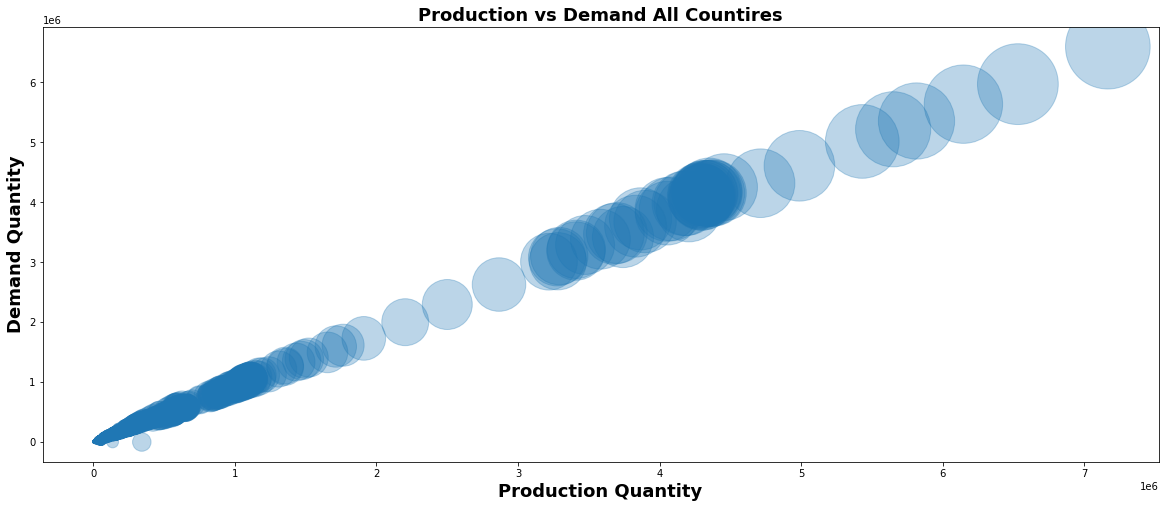

In [29]:
production_demand_quantity["Production Quantity Ch%"]="Production Quantity Ch%"
production_demand_quantity["Demand Quantity Ch%"]="Demand Quantity Ch%"

production_demand_quantity.loc[:,"Production_Demand_Diff"]=production_demand_quantity.loc[:,"Production Quantity Kwh mm"]- production_demand_quantity.loc[:,"Demand Quantity Kwh mm"]
fig, ax = plt.subplots(figsize=(20, 8))
ax.scatter(x=production_demand_quantity.loc[:,"Production Quantity"], 
           y=production_demand_quantity.loc[:,"Demand Quantity"], 
           alpha=0.3, cmap='viridis',s=production_demand_quantity.loc[:,'Production Quantity Kwh mm'])
plt.xlabel('Production Quantity', fontweight ='bold', fontsize=18)
plt.ylabel('Demand Quantity',fontweight ='bold', fontsize=18)
plt.title('Production vs Demand All Countires', fontweight ='bold', fontsize=18)
plt.show()

Text(0.5, 1.0, 'Electricity Production vs Demand in 2019')

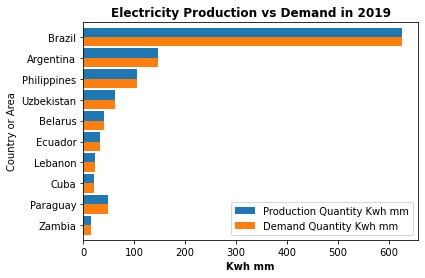

In [12]:
production_demand_quantity_2019=production_demand_quantity[production_demand_quantity["Year"]==2019]
production_demand_quantity_2019=production_demand_quantity_2019.sort_values("Demand Quantity", ascending=False)
production_demand_quantity_2019_top=production_demand_quantity_2019.head(10)
production_demand_quantity_2019_top.plot.barh(x="Country or Area", y=['Production Quantity Kwh mm', 'Demand Quantity Kwh mm'], width=0.9).invert_yaxis()
plt.xlabel('Kwh mm',fontweight ='bold')
plt.title('Electricity Production vs Demand in 2019', fontweight ='bold')

[]

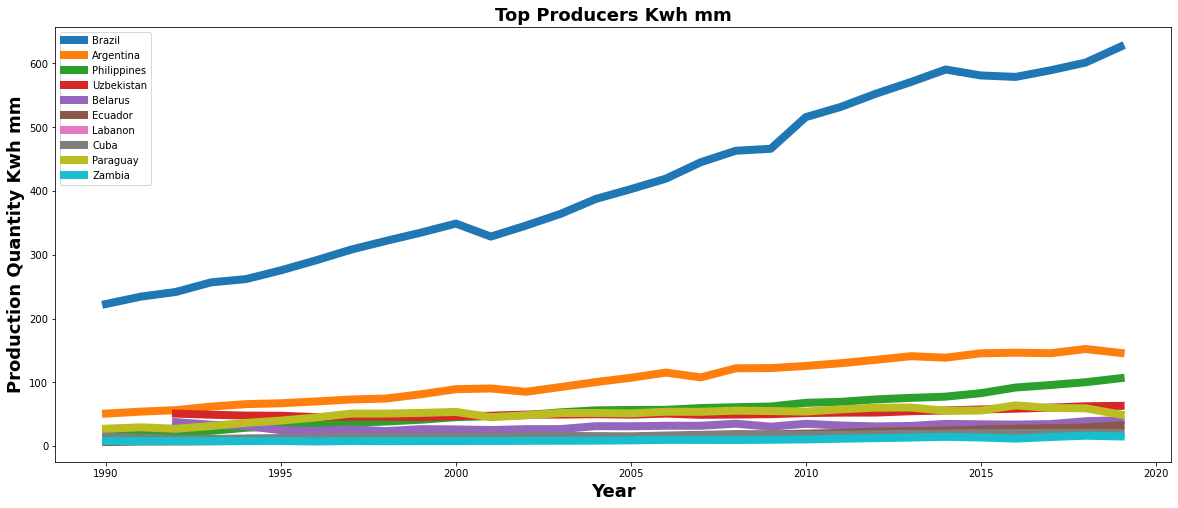

In [27]:
production_all_years=production_demand_quantity[production_demand_quantity['Country or Area'].isin(['Brazil', 'Argentina','Philippines','Uzbekistan','Belarus','Ecuador','Labanon','Cuba','Paraguay','Zambia'])]
countries=['Brazil', 'Argentina','Philippines','Uzbekistan','Belarus','Ecuador','Labanon','Cuba','Paraguay','Zambia']
fig, ax = plt.subplots(figsize=(20, 8))
for ctry in countries:
    ax.plot(production_all_years.loc[production_all_years['Country or Area']==ctry, 'Year'],
           production_all_years.loc[production_all_years['Country or Area']==ctry, 'Production Quantity Kwh mm'], linewidth = '8')
plt.xlabel('Year',fontweight ='bold', fontsize=18 )   
plt.ylabel('Production Quantity Kwh mm',fontweight ='bold', fontsize=18 )
plt.title('Top Producers Kwh mm', fontweight ='bold', fontsize=18)
plt.legend(countries)
plt.plot()


In [14]:
production_demand_quantity.sort_values(['Country or Area', 'Year', 'Production Quantity Kwh mm'], ascending=(True, True, True)).head()
production_demand_quantity.loc[:, "Production Quantity Ch%"]=production_demand_quantity.loc[:, "Production Quantity"].pct_change()
production_demand_quantity.loc[:, "Demand Quantity Ch%"]=production_demand_quantity.loc[:, "Demand Quantity"].pct_change()
production_demand_quantity.head()
production_demand_quantity.sort_values(['Country or Area', 'Year'], ascending=(True, True)).head()


,Country or Area,Year,Production Quantity,Demand Quantity,Production Quantity Kwh mm,Demand Quantity Kwh mm,Production Quantity Ch%,Demand Quantity Ch%,Production_Demand_Diff
29,Afghanistan,1990,1128.0,1055.0,1.1,1.1,0.111330,0.116402,0.0
28,Afghanistan,1991,1015.0,945.0,1.0,1.0,0.443812,0.197719,0.0
27,Afghanistan,1992,703.0,789.0,0.7,0.7,0.011511,0.011538,0.0
26,Afghanistan,1993,695.0,780.0,0.7,0.7,0.011645,0.012987,0.0
25,Afghanistan,1994,687.0,770.0,0.7,0.7,0.017778,0.022576,0.0


In [16]:
df_one = pd.pivot_table(production_demand_quantity,values='Production Quantity Kwh mm',index='Year',columns='Country or Area')
df_two = df_one.pct_change()
df_two.apply(lambda x: x*100)
df_two.iloc[1:,:].head()

Country or Area,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Vanuatu,Venezuela (Bolivar. Rep.),Viet Nam,Wallis and Futuna Is.,Yemen,Yemen Arab Rep. (former),"Yemen, Dem. (former)","Yugoslavia, SFR (former)",Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1991,-0.090909,0.187500,0.074534,0.0,0.0,0.125000,NaN,0.0,0.060904,NaN,...,NaN,0.011765,0.057471,NaN,NaN,0.0,0.0,-0.048251,0.000000,-0.053191
1992,-0.300000,-0.105263,0.057803,0.0,0.0,0.000000,NaN,0.0,0.042593,NaN,...,NaN,0.098007,0.043478,NaN,0.100000,0.0,0.0,0.000000,0.000000,-0.078652
1993,0.000000,0.029412,0.060109,0.0,0.0,0.111111,NaN,0.0,0.099467,-0.300000,...,NaN,0.083207,0.104167,NaN,0.090909,0.0,0.0,0.000000,0.000000,-0.085366
1994,0.000000,0.114286,0.025773,0.0,0.0,0.000000,NaN,0.0,0.061389,-0.095238,...,NaN,-0.005587,0.122642,NaN,-0.083333,0.0,0.0,0.000000,0.000000,0.040000
1995,0.000000,0.128205,-0.010050,0.0,0.0,0.000000,NaN,0.0,0.021309,-0.017544,...,NaN,0.058989,0.226891,NaN,0.090909,0.0,0.0,0.000000,0.012821,0.000000


In [18]:
df_summary = df_two.iloc[1:,:].describe()
clean_summary= df_summary.iloc[-1,:].dropna()
top_prod_changers = clean_summary[clean_summary != np.inf].sort_values(ascending=False)[:10].index
df_two.iloc[1:, np.argwhere(df_two.columns.isin(top_prod_changers)).flatten()].head()

C:\Users\U6033919\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3964: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t>=0.5)


Country or Area,Bahrain,Botswana,Congo,Guernsey,Guyana,Lao People's Dem. Rep.,Luxembourg,Mozambique,Timor-Leste,Togo
Year,,,,,,,,,,
1991,-0.052632,0.000000,0.00,NaN,-0.333333,0.000000,0.000000,0.0,NaN,0.500000
1992,0.083333,0.222222,-0.20,NaN,0.000000,-0.111111,-0.142857,-0.2,NaN,-0.333333
1993,0.076923,0.000000,0.00,NaN,0.000000,0.250000,-0.083333,0.0,NaN,0.500000
1994,0.095238,0.000000,0.00,NaN,2.000000,0.200000,0.000000,0.0,NaN,-0.333333
1995,0.000000,-0.090909,-0.25,NaN,0.000000,-0.083333,0.090909,0.0,NaN,1.000000


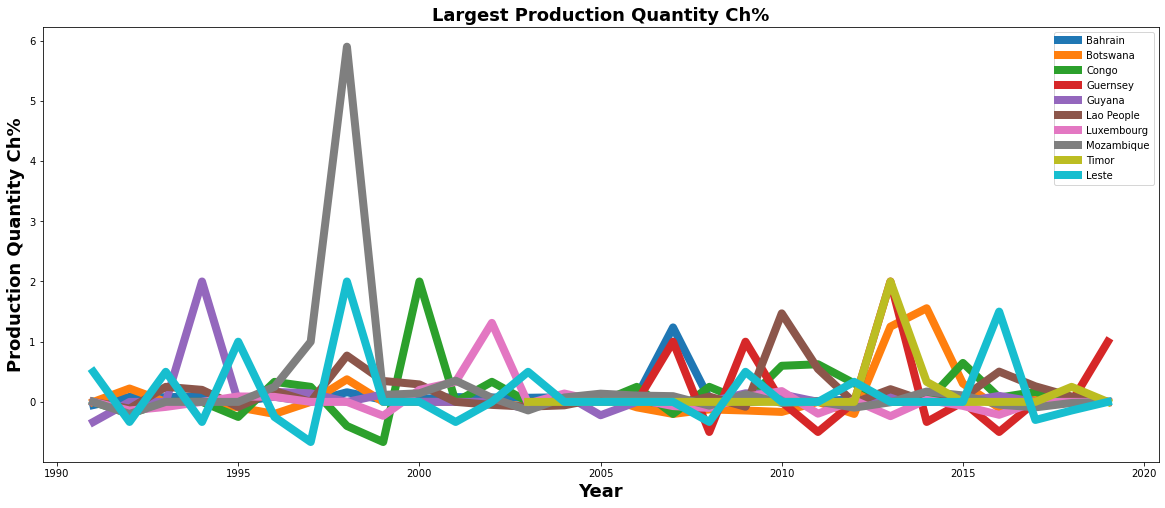

In [19]:
topch_plot=df_two.iloc[1:, np.argwhere(df_two.columns.isin(top_prod_changers)).flatten()]
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(topch_plot, linewidth = '8')
plt.xlabel('Year', fontweight ='bold', fontsize=18)
plt.ylabel('Production Quantity Ch%', fontweight ='bold', fontsize=18)
plt.legend(['Bahrain', 'Botswana', 'Congo', 'Guernsey', 'Guyana', 'Lao People', 'Luxembourg', 'Mozambique','Timor','Leste','Togo' ], loc='upper right')
plt.title('Largest Production Quantity Ch%', fontweight ='bold', fontsize=18)
plt.show()